In [1]:
import py_midicsv as pm  # Documentation at https://github.com/timwedde/py_midicsv
import pandas as pd
import io
import numpy as np
from hmmlearn import hmm
from midi2audio import FluidSynth
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'midi2audio'

In [2]:
!pwd

/Users/erikaibarra/Desktop/aircraft-stability-team/vol3_semester2


In [2]:

# csv_midi = pm.midi_to_csv("/Users/brycelunceford/Documents/Projects/ACMEProject/vol3_semester2/piano_sonata_310_1_(c)oguri.mid")
csv_midi = pm.midi_to_csv("piano_sonata_310_1_(c)oguri.mid")

df = pd.read_csv(io.StringIO("".join(csv_midi)), names=[
                 "track", "time", "type", "extra_0", "extra_1", "extra_2", "extra_3", "extra_4"], on_bad_lines="warn", skipinitialspace=True)

# Explanation of the confusing file format is found at https://github.com/timwedde/py_midicsv/blob/master/doc/file-format.md
df


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
0,0,0,Header,1,20.0,240.0,NaN,NaN
1,1,0,Start_track,NaN,NaN,NaN,NaN,NaN
2,1,0,Tempo,491803,NaN,NaN,NaN,NaN
3,1,0,Time_signature,4,2.0,24.0,8.0,NaN
4,1,0,Text_t,Mozart Sonate a moll K.V.310 (1st.mov.) Play ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7470,19,0,End_track,NaN,NaN,NaN,NaN,NaN
7471,20,0,Start_track,NaN,NaN,NaN,NaN,NaN
7472,20,1,Copyright_t,______________________________________________...,NaN,NaN,NaN,NaN
7473,20,1,End_track,NaN,NaN,NaN,NaN,NaN


In [3]:
df0 = df.loc[df["track"] == 0, :]
df0


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
0,0,0,Header,1,20.0,240.0,NaN,NaN
7474,0,0,End_of_file,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = df.loc[df["track"] == 1, :]
df1


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
1,1,0,Start_track,NaN,NaN,NaN,NaN,NaN
2,1,0,Tempo,491803,NaN,NaN,NaN,NaN
3,1,0,Time_signature,4,2.0,24.0,8.0,NaN
4,1,0,Text_t,Mozart Sonate a moll K.V.310 (1st.mov.) Play ...,NaN,NaN,NaN,NaN
5,1,0,End_track,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = df.loc[df["track"] == 2, :]
df2['type'].unique()


array(['Start_track', 'Time_signature', 'Title_t', 'System_exclusive',
       'Control_c', 'Program_c', 'Note_on_c', 'End_track'], dtype=object)

In [6]:
df3 = df.loc[df["track"] == 3, :]
df3


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
7403,3,0,Start_track,NaN,NaN,NaN,NaN,NaN
7404,3,0,Time_signature,4,2.0,24.0,8.0,NaN
7405,3,0,Title_t,,NaN,NaN,NaN,NaN
7406,3,0,End_track,NaN,NaN,NaN,NaN,NaN


In [7]:
df4 = df.loc[df["track"] == 4, :]
df4


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
7407,4,0,Start_track,NaN,NaN,NaN,NaN,NaN
7408,4,0,Time_signature,4,2.0,24.0,8.0,NaN
7409,4,0,Title_t,,NaN,NaN,NaN,NaN
7410,4,0,End_track,NaN,NaN,NaN,NaN,NaN


In [8]:
df5 = df.loc[df["track"] == 5, :]
df5


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
7411,5,0,Start_track,NaN,NaN,NaN,NaN,NaN
7412,5,0,Time_signature,4,2.0,24.0,8.0,NaN
7413,5,0,Title_t,,NaN,NaN,NaN,NaN
7414,5,0,End_track,NaN,NaN,NaN,NaN,NaN


In [9]:
df6 = df.loc[df["track"] == 6, :]
df6


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
7415,6,0,Start_track,NaN,NaN,NaN,NaN,NaN
7416,6,0,Time_signature,4,2.0,24.0,8.0,NaN
7417,6,0,Title_t,,NaN,NaN,NaN,NaN
7418,6,0,End_track,NaN,NaN,NaN,NaN,NaN


In [10]:
notes_on = df2[df2["type"] == "Note_on_c"]
notes_on


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4
39,2,1327,Note_on_c,0,75.0,101.0,NaN,NaN
40,2,1339,Note_on_c,0,64.0,86.0,NaN,NaN
41,2,1342,Note_on_c,0,57.0,76.0,NaN,NaN
42,2,1342,Note_on_c,0,60.0,85.0,NaN,NaN
43,2,1363,Note_on_c,0,76.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...
7393,2,120546,Note_on_c,0,64.0,0.0,NaN,NaN
7394,2,120562,Note_on_c,0,33.0,0.0,NaN,NaN
7395,2,120564,Note_on_c,0,45.0,0.0,NaN,NaN
7396,2,120565,Note_on_c,0,72.0,0.0,NaN,NaN


In [11]:
df[df["type"] == "Key_signature"]


,track,time,type,extra_0,extra_1,extra_2,extra_3,extra_4


In [12]:
def old_func():
    """ Create a master array that shows the state of each piano key at every time step of the song 
    The first column of master_array indicates if the key is being pressed (1) or not (0)
    The second column indicates the speed the key is being pressed; a 0 indicates that it's not being pressed
    """

    master_array = np.zeros((time_steps[-1] + 1, 88, 2))

    j = 0
    for i in range(len(time_steps)):

        while j != time_steps[i]:
            j += 1
            """ if nothing changes, make the current state equal to the past state """
            master_array[j] = master_array[j - 1]

        master_array[j][int(notes[i]) - 20] = [(master_array[j]
                                                [int(notes[i]) - 20][0] + 1) % 2, speed[i]]

    """ now that the master_array is filled in, we will now find all unique note values for any given time step, and
        then we'll assign each unique vector to a number in a dictionary """

    master_dict = {}
    columns = master_array[:, :, 0]
    unique_columns = np.unique(columns, axis=0)

    for i in range(len(unique_columns)):
        master_dict[i] = unique_columns[i]

    return master_array, master_dict


def new_func():
    """ Create a master array that shows the state of each piano key at every time step of the song 
    The first column of master_array indicates if the key is being pressed (1), depressed (-1), or the same (0)
    The second column indicates the speed the key is being pressed; a 0 indicates that it's not being pressed
    """

    master_array = np.zeros((time_steps[-1] + 1, 88, 2))

    j = 0
    for i in range(len(time_steps)):

        while j != time_steps[i]:
            j += 1

        if speeds[i] > 0:
            """ if the speed is positive, then the note is being pressed, so set it as a 1 """
            master_array[j][int(notes[i]) - 20] = [1, speeds[i]]

        elif speeds[i] == 0:
            """ if the speed is 0, the note is being depressed, so set it as a -1"""
            master_array[j][int(notes[i]) - 20] = [-1, speeds[i]]

    """ now that the master_array is filled in, we will now find all unique note values for any given time step, and
        then we'll assign each unique vector to a number in a dictionary """

    numbers_to_arrays = {}
    arrays_to_numbers = {}
    columns = master_array[:, :, 0]
    unique_columns = np.unique(columns, axis=0)

    for i in range(len(unique_columns)):
        numbers_to_arrays[i] = unique_columns[i]
        arrays_to_numbers[unique_columns[i].tobytes()] = i

    return master_array, numbers_to_arrays, arrays_to_numbers


def reconstruct(sample_notes, speeds):
    # Add header and footer information
    #To do
    header_info = [
        (0, 0, "Header", 1, 2, 240, pd.NA, pd.NA),
        (1, 0, "Start_track", pd.NA, pd.NA, pd.NA, pd.NA, pd.NA),
        (1, 0, "Time_signature", 4, 2, 24, 8, pd.NA),
        (1, 0, "End_track", pd.NA, pd.NA, pd.NA, pd.NA, pd.NA)
    ]
    footer_info = [
        (0, 0, "End_of_file", pd.NA, pd.NA, pd.NA, pd.NA, pd.NA)
    ]

    # Convert sample_notes array into data frame
    piano_track = 2 # This seems typical
    piano_channel = 0 # We've never seen this change
    note_offset = 20 # This is from our conversion from csv to array

    data = []
    data.append((2, 0, "Start_track", pd.NA, pd.NA, pd.NA, pd.NA, pd.NA))
    for time in range(sample_notes.shape[0]): # This tells the time
        for index in range(sample_notes.shape[1]): # This tells which note (-20)
            value = sample_notes[time,index]
            if value != 0:
                note = index + note_offset
                velocity = 0 if value == -1 else speeds[time, index] # 0 means turn a note off, otherwise look at speeds to determine note velocity
                # Rows look like: track, time, type, channel, note, velocity
                data.append((int(piano_track), int(time), "Note_on_c", int(piano_channel), int(note), int(velocity), pd.NA, pd.NA))
    data.append((2, len(sample_notes), "End_track", pd.NA, pd.NA, pd.NA, pd.NA, pd.NA))
    
    notes_df = pd.DataFrame(header_info + data + footer_info, columns=["track", "time", "type", "extra_0", "extra_1", "extra_2", "extra_3", "extra_4"])
    notes_df
    return notes_df


def notes_to_numbers(master_array, arrays_to_numbers):
    """ this function takes the arrays_to_numbers dictionary and returns an array of digits where each digit represents
        one of the unique actions that occurs in this song """
    digits_array = []

    for i in range(len(master_array)):
        digits_array.append(arrays_to_numbers[master_array[i, :, 0].tobytes()])

    return np.array(digits_array)


def numbers_to_notes(notes_array, numbers_to_arrays):
    """ this function takes the numbers_to_arrays dictionary and returns an array of notes """
    new_array = []

    for i in range(len(notes_array)):
        new_array.append(numbers_to_arrays[notes_array[i]])

    return np.array(new_array)


In [13]:
time_steps = np.array(notes_on["time"])
notes = np.array(notes_on["extra_1"])
speeds = np.array(notes_on["extra_2"]).astype(int)

master_array, numbers_to_arrays, arrays_to_numbers = new_func()

print(master_array)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


In [14]:
digits_array = notes_to_numbers(master_array, arrays_to_numbers)
notes_array = numbers_to_notes(digits_array, numbers_to_arrays)

num_obs = len(np.unique(digits_array, axis=0))


In [15]:
notes = hmm.MultinomialHMM(n_components=20, n_iter=20, tol=0.01, verbose=True)
notes.fit(digits_array.reshape(-1, 1))

         1     -700759.0203             +nan
         2      -52699.8703     +648059.1500
         3      -52699.8102          +0.0602
         4      -52699.7490          +0.0611
         5      -52699.6866          +0.0624
         6      -52699.6227          +0.0640
         7      -52699.5568          +0.0659
         8      -52699.4886          +0.0682
         9      -52699.4178          +0.0709
        10      -52699.3438          +0.0740
        11      -52699.2661          +0.0777
        12      -52699.1842          +0.0819
        13      -52699.0974          +0.0868
        14      -52699.0049          +0.0925
        15      -52698.9057          +0.0991
        16      -52698.7990          +0.1068
        17      -52698.6833          +0.1157
        18      -52698.5571          +0.1261
        19      -52698.4187          +0.1384
        20      -52698.2658          +0.1529


MultinomialHMM(n_components=20, n_iter=20,
               random_state=RandomState(MT19937) at 0x159953C0D08,
               verbose=True)

In [24]:
note_state = notes.predict(digits_array.reshape(-1, 1))
np.unique(note_state)
note_state.shape

(120569,)

In [25]:
speeds_alone = master_array[:,:,1]
notes_alone = master_array[:,:,0]
note_state = np.zeros_like(speeds_alone) + note_state[:,None]

mask = notes_alone == 1
extracted_speeds = speeds_alone[mask]
speed_states = note_state[mask]

print(extracted_speeds.shape)


(3301,)


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


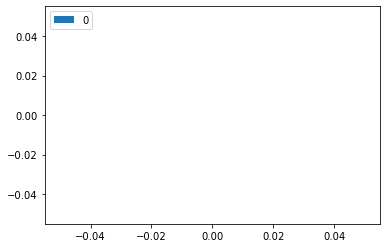

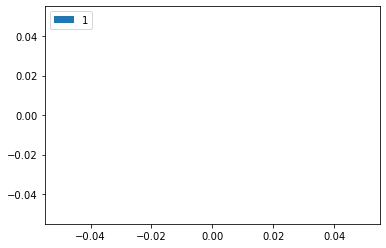

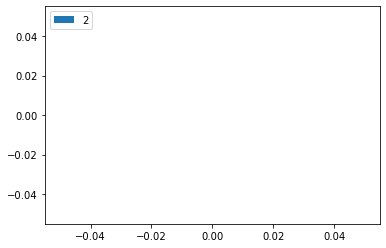

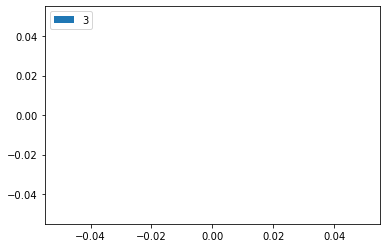

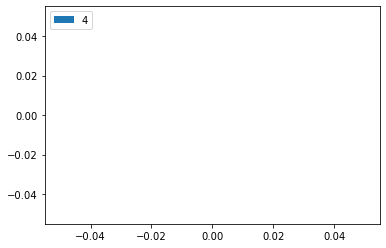

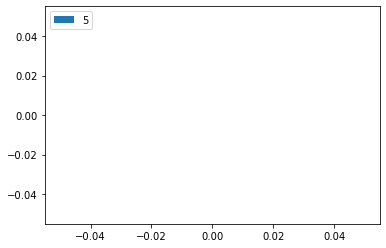

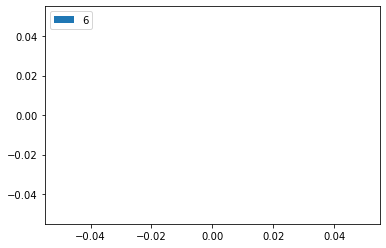

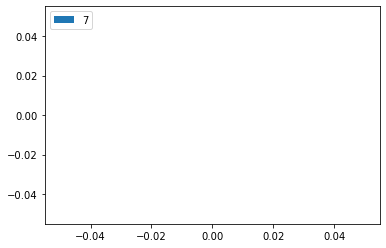

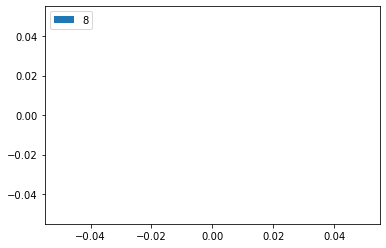

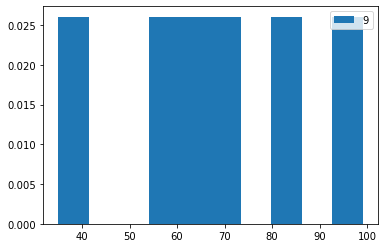

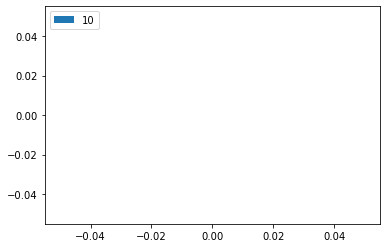

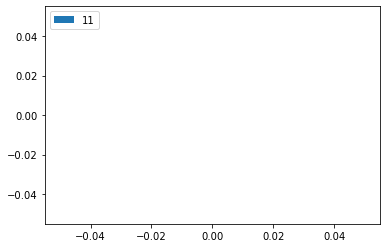

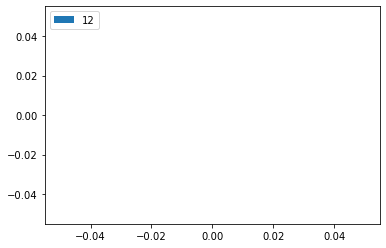

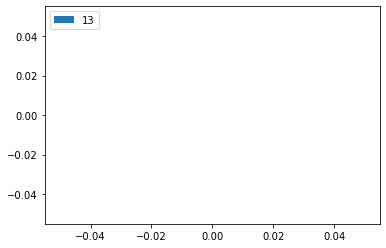

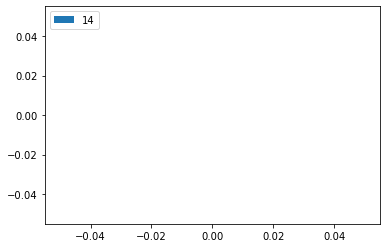

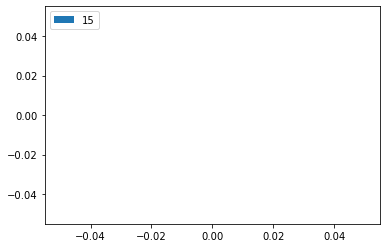

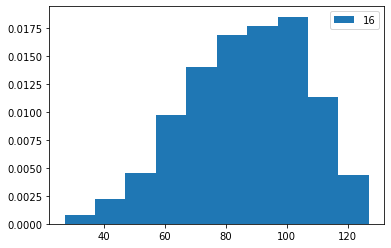

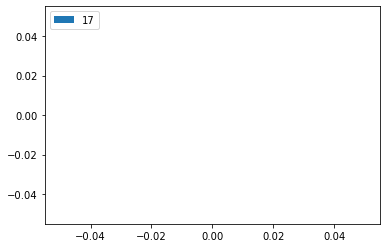

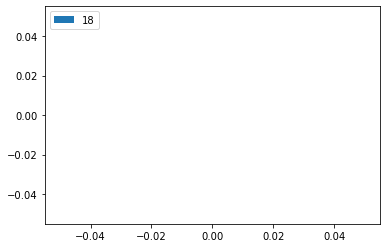

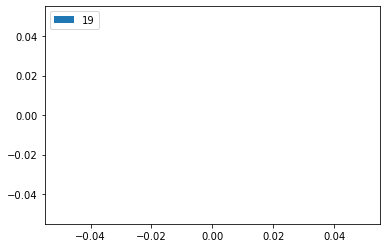

In [19]:
for i in range(0,20):
    mask2 = speed_states == i
    plt.hist(extracted_speeds[mask2], label=f'{i}', density=True)

    plt.legend()
    plt.show()

In [18]:
speed_averages = np.array([np.mean(extracted_speeds[speed_states == i]) for i in range(int(np.max(speed_states)+1))])
speed_averages

array([72.125     , 91.40611354, 93.35087719, 80.11675127, 94.20588235,
       88.39739414, 75.86390533, 95.18707483, 86.25114155, 90.38297872,
       78.29508197, 75.98130841, 93.57777778, 83.00943396, 94.76923077,
       89.68604651, 88.78067885, 81.89361702, 76.07462687, 91.69512195])

In [19]:
sample_digits, sample_states = notes.sample(n_samples=20000)
sample_digits = sample_digits.reshape(-1)
sample_notes = numbers_to_notes(sample_digits, numbers_to_arrays)

sample_speeds = sample_notes.copy()

# assigning avergae speeds to states
for i in range(len(sample_speeds)):
    mask = sample_speeds[i] == 1
    sample_speeds[i][mask] = speed_averages[sample_states[i]]

print(sample_speeds)
print(sample_states)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[12 14 12 ...  1  9  7]


In [ ]:
# speeds = np.ones_like(sample_notes, dtype=int) * 50

new_song_csv = reconstruct(sample_notes[:, None], sample_speeds)
new_song_csv

In [ ]:
out_buf1 = io.StringIO()
out_buf2 = io.StringIO()
new_song_csv.to_csv(out_buf1, header=False, index=False)
out_buf1.seek(0)

stripped_lines = []
for line in out_buf1.readlines():
    stripped_lines.append(line.strip().strip(",")+"\n")

out_buf2.writelines(stripped_lines)
out_buf2.seek(0)

new_song_midi = pm.csv_to_midi(out_buf2)

In [ ]:
with open("output_file.mid", "wb") as outfile:
    writer = pm.FileWriter(outfile)
    writer.write(new_song_midi)


In [ ]:

FluidSynth().play_midi("output_file.mid")

In [ ]:
for state in sample_states:
    print(state)

In [ ]:
sample_speeds.shape

In [1]:
import py_midicsv as pm  # Documentation at https://github.com/timwedde/py_midicsv
import pandas as pd
import io
import numpy as np
from hmmlearn import hmm
# from midi2audio import FluidSynth
import matplotlib.pyplot as plt
from midi_transform import MidiTransform

In [5]:
song = MidiTransform()
note_digits, speed_digits = song.read_midi_file("piano_sonata_310_1_(c)oguri.mid")

number_of_states = 20

In [6]:
notes = hmm.MultinomialHMM(n_components=number_of_states, n_iter=1000, tol=0.01, verbose=True)
notes.fit(note_digits.reshape(-1, 1))

         1     -690020.5723             +nan
         2      -52699.5238     +637321.0485
         3      -52699.0791          +0.4447
         4      -52698.5778          +0.5013
         5      -52697.9939          +0.5839
         6      -52697.2873          +0.7065
         7      -52696.3918          +0.8955
         8      -52695.1858          +1.2060
         9      -52693.4147          +1.7711
        10      -52690.4883          +2.9264
        11      -52685.3079          +5.1804
        12      -52676.3141          +8.9939
        13      -52660.0084         +16.3057
        14      -52631.1679         +28.8405
        15      -52584.7744         +46.3935
        16      -52524.3422         +60.4322
        17      -52465.6437         +58.6985
        18      -52422.5893         +43.0545
        19      -52393.7407         +28.8486
        20      -52372.1188         +21.6220
        21      -52353.3768         +18.7419
        22      -52335.1750         +18.2018
        23

       184      -51551.7223          +0.4575
       185      -51551.2436          +0.4787
       186      -51550.7422          +0.5014
       187      -51550.2163          +0.5259
       188      -51549.6641          +0.5522
       189      -51549.0835          +0.5806
       190      -51548.4723          +0.6111
       191      -51547.8283          +0.6440
       192      -51547.1490          +0.6793
       193      -51546.4319          +0.7171
       194      -51545.6743          +0.7576
       195      -51544.8732          +0.8011
       196      -51544.0250          +0.8482
       197      -51543.1258          +0.8993
       198      -51542.1721          +0.9537
       199      -51541.1637          +1.0083
       200      -51540.1060          +1.0577
       201      -51539.0075          +1.0985
       202      -51537.8734          +1.1341
       203      -51536.6996          +1.1738
       204      -51535.4731          +1.2266
       205      -51534.1754          +1.2976
       206

       367      -51323.4049          +0.6859
       368      -51322.7261          +0.6787
       369      -51322.0429          +0.6833
       370      -51321.3439          +0.6990
       371      -51320.6253          +0.7186
       372      -51319.8988          +0.7265
       373      -51319.1884          +0.7104
       374      -51318.5120          +0.6764
       375      -51317.8716          +0.6404
       376      -51317.2587          +0.6129
       377      -51316.6632          +0.5954
       378      -51316.0774          +0.5858
       379      -51315.4959          +0.5815
       380      -51314.9152          +0.5807
       381      -51314.3332          +0.5820
       382      -51313.7492          +0.5840
       383      -51313.1635          +0.5857
       384      -51312.5772          +0.5863
       385      -51311.9912          +0.5860
       386      -51311.4060          +0.5852
       387      -51310.8212          +0.5849
       388      -51310.2353          +0.5859
       389

       550      -51206.9035          +0.7013
       551      -51206.1370          +0.7665
       552      -51205.3182          +0.8188
       553      -51204.4831          +0.8351
       554      -51203.6169          +0.8662
       555      -51202.7112          +0.9057
       556      -51201.8565          +0.8547
       557      -51201.1201          +0.7364
       558      -51200.4716          +0.6485
       559      -51199.8642          +0.6074
       560      -51199.2732          +0.5910
       561      -51198.6889          +0.5842
       562      -51198.1084          +0.5806
       563      -51197.5307          +0.5777
       564      -51196.9559          +0.5748
       565      -51196.3840          +0.5719
       566      -51195.8153          +0.5687
       567      -51195.2498          +0.5655
       568      -51194.6874          +0.5623
       569      -51194.1283          +0.5592
       570      -51193.5722          +0.5561
       571      -51193.0190          +0.5532
       572

       733      -51100.6319          +0.5087
       734      -51100.0378          +0.5940
       735      -51099.3407          +0.6971
       736      -51098.6558          +0.6849
       737      -51098.0628          +0.5931
       738      -51097.4795          +0.5832
       739      -51096.7474          +0.7322
       740      -51095.7763          +0.9711
       741      -51094.7214          +1.0549
       742      -51093.8264          +0.8950
       743      -51092.9947          +0.8317
       744      -51091.9168          +1.0779
       745      -51090.4635          +1.4534
       746      -51088.9075          +1.5559
       747      -51087.6358          +1.2717
       748      -51086.6758          +0.9601
       749      -51085.8995          +0.7763
       750      -51085.2203          +0.6791
       751      -51084.5925          +0.6279
       752      -51083.9813          +0.6111
       753      -51083.3354          +0.6459
       754      -51082.5509          +0.7844
       755

       916      -50991.4768          +1.6871
       917      -50990.2278          +1.2490
       918      -50989.3814          +0.8464
       919      -50988.7236          +0.6578
       920      -50988.1217          +0.6019
       921      -50987.5232          +0.5984
       922      -50986.9109          +0.6123
       923      -50986.2808          +0.6302
       924      -50985.6339          +0.6468
       925      -50984.9740          +0.6599
       926      -50984.3058          +0.6682
       927      -50983.6350          +0.6709
       928      -50982.9674          +0.6676
       929      -50982.3095          +0.6579
       930      -50981.6680          +0.6416
       931      -50981.0486          +0.6193
       932      -50980.4554          +0.5933
       933      -50979.8890          +0.5664
       934      -50979.3478          +0.5412
       935      -50978.8290          +0.5189
       936      -50978.3296          +0.4994
       937      -50977.8475          +0.4822
       938

MultinomialHMM(n_components=20, n_iter=1000,
               random_state=RandomState(MT19937) at 0x1A368B9A8C8,
               verbose=True)

In [18]:
note_states = notes.predict(note_digits.reshape(-1, 1))

new_notes, new_note_states = notes.sample(n_samples=20000)
new_notes = new_notes.reshape(-1)

new_speeds = np.zeros(len(new_note_states))

for i in range(number_of_states):
    mask = note_states == i
    distribution = speed_digits[mask]
    
    if len(distribution) == 0:
        continue
        
    needed_samples = np.sum(new_note_states == i)
    
    sample = np.random.choice(distribution, size=needed_samples)
    new_speeds[new_note_states == i] = sample
    
new_speeds = new_speeds.astype(int)

In [19]:
song.save_as_midi(new_notes, new_speeds, "output.mid")